In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_id = df[df['job_country'] == 'Indonesia'].copy()
df_id['job_posted_month'] = df_id['job_posted_date'].dt.strftime('%B')
df_id_pivot = df_id.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_id_pivot.reset_index(inplace=True)
df_id_pivot['month_no'] = pd.to_datetime(df_id_pivot['job_posted_month'], format='%B').dt.month
df_id_pivot['month_no']
df_id_pivot.sort_values('month_no', inplace = True)
df_id_pivot.set_index('job_posted_month', inplace = True)
df_id_pivot.drop(columns='month_no', inplace=True)
df_id_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,14,9,35,117,80,8,5,10,19,14
February,9,2,25,78,44,5,4,12,5,18
March,6,5,21,90,36,2,1,13,5,14
April,5,3,20,46,28,2,1,9,8,14
May,11,9,25,79,39,3,2,8,9,4
June,11,4,22,66,32,4,1,8,9,8
July,11,3,25,58,46,9,4,8,3,20
August,12,5,32,78,46,1,3,5,5,15
September,4,7,34,83,50,6,5,10,8,9


In [5]:
df_id_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
df_id_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [7]:
df_id_merged = df_id_pivot.merge(df_id_software_pivot, on='job_posted_month')

In [14]:
top_5 = (
    df_id_merged
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .to_list()
    )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

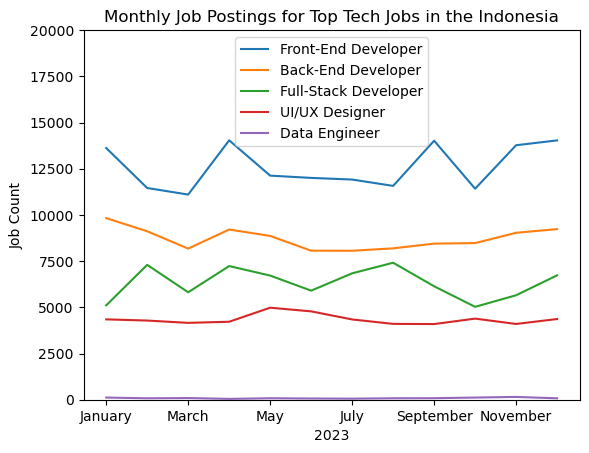

In [16]:
df_id_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the Indonesia')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000)
plt.legend()
plt.show()